# (1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

df=load_diabetes()
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [2]:
X = df.data
y = df.target
print(X.shape,y.shape)
X.dtype
X

(442, 10) (442,)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

# (번외) Loss를 줄이기 위해 X 데이터셋 조정하기

In [3]:
X_df_frame = pd.DataFrame(X)
X_df_frame

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
X_df_frame.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


<AxesSubplot:>

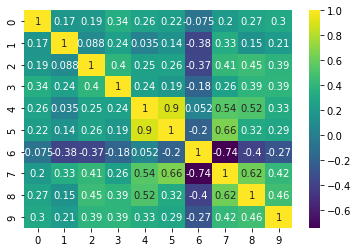

In [5]:
sns.heatmap(X_df_frame.corr(), annot = True, cmap = 'viridis')

In [6]:
# X = df.data
# y = df.target
# X = np.delete(X,6,1)
# print(X.shape,y.shape)
# X.dtype
# X

### max의 절댓값이 가장 높은 성별을 drop했었지만, max로 feature을 drop하는 방법이 적합하지 않을 것 같다는 생각과, 실제로 데이터가 부족해 loss가 떨어지지 않음을 보고, 이는 취소하기로 함.

# (2),(3) 모델에 입력할 데이터 X,y  준비하기

In [7]:
X = np.array(X)
y = np.array(y)

# (4) train 데이터와 test 데이터로 분리하기

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


# (5) 모델 준비하기

In [9]:
np.random.seed(42)
W = np.random.rand(10)
b = np.random.rand()
b
W

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [10]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# (6) 손실함수 loss 정의하기

In [11]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [12]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# (7) 기울기를 구하는 gradient 함수 구현하기

In [13]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [14]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36960944 -0.30751066 -4.28666592 -3.22491509 -1.54518769 -1.26702027
  2.88390777 -3.14188309 -4.13466238 -2.79169532]
db: -304.22579933720027


# (8) 하이퍼 파라미터인 학습률 설정하기

In [15]:
LEARNING_RATE = 0.05

# (9) 모델 학습하기

In [16]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
        #Iteration 10000 : Loss 2914.6970
        #Iteration 10000 : Loss 3022.9808 ([1]sex drop : Max )
        
        

Iteration 10 : Loss 8892.4101
Iteration 20 : Loss 6329.9380
Iteration 30 : Loss 5984.9154
Iteration 40 : Loss 5909.9999
Iteration 50 : Loss 5868.4384
Iteration 60 : Loss 5831.4392
Iteration 70 : Loss 5795.4934
Iteration 80 : Loss 5760.1658
Iteration 90 : Loss 5725.3952
Iteration 100 : Loss 5691.1658
Iteration 110 : Loss 5657.4677
Iteration 120 : Loss 5624.2917
Iteration 130 : Loss 5591.6289
Iteration 140 : Loss 5559.4705
Iteration 150 : Loss 5527.8078
Iteration 160 : Loss 5496.6326
Iteration 170 : Loss 5465.9364
Iteration 180 : Loss 5435.7111
Iteration 190 : Loss 5405.9487
Iteration 200 : Loss 5376.6413
Iteration 210 : Loss 5347.7812
Iteration 220 : Loss 5319.3608
Iteration 230 : Loss 5291.3727
Iteration 240 : Loss 5263.8094
Iteration 250 : Loss 5236.6638
Iteration 260 : Loss 5209.9289
Iteration 270 : Loss 5183.5976
Iteration 280 : Loss 5157.6631
Iteration 290 : Loss 5132.1188
Iteration 300 : Loss 5106.9580
Iteration 310 : Loss 5082.1743
Iteration 320 : Loss 5057.7613
Iteration 330 : L

Iteration 3030 : Loss 3209.9291
Iteration 3040 : Loss 3208.3747
Iteration 3050 : Loss 3206.8298
Iteration 3060 : Loss 3205.2944
Iteration 3070 : Loss 3203.7682
Iteration 3080 : Loss 3202.2513
Iteration 3090 : Loss 3200.7435
Iteration 3100 : Loss 3199.2448
Iteration 3110 : Loss 3197.7552
Iteration 3120 : Loss 3196.2744
Iteration 3130 : Loss 3194.8026
Iteration 3140 : Loss 3193.3395
Iteration 3150 : Loss 3191.8852
Iteration 3160 : Loss 3190.4395
Iteration 3170 : Loss 3189.0023
Iteration 3180 : Loss 3187.5737
Iteration 3190 : Loss 3186.1535
Iteration 3200 : Loss 3184.7417
Iteration 3210 : Loss 3183.3382
Iteration 3220 : Loss 3181.9429
Iteration 3230 : Loss 3180.5558
Iteration 3240 : Loss 3179.1768
Iteration 3250 : Loss 3177.8059
Iteration 3260 : Loss 3176.4429
Iteration 3270 : Loss 3175.0878
Iteration 3280 : Loss 3173.7406
Iteration 3290 : Loss 3172.4012
Iteration 3300 : Loss 3171.0695
Iteration 3310 : Loss 3169.7455
Iteration 3320 : Loss 3168.4291
Iteration 3330 : Loss 3167.1202
Iteratio

Iteration 5710 : Loss 2989.7082
Iteration 5720 : Loss 2989.3156
Iteration 5730 : Loss 2988.9249
Iteration 5740 : Loss 2988.5359
Iteration 5750 : Loss 2988.1487
Iteration 5760 : Loss 2987.7634
Iteration 5770 : Loss 2987.3798
Iteration 5780 : Loss 2986.9980
Iteration 5790 : Loss 2986.6180
Iteration 5800 : Loss 2986.2397
Iteration 5810 : Loss 2985.8632
Iteration 5820 : Loss 2985.4885
Iteration 5830 : Loss 2985.1155
Iteration 5840 : Loss 2984.7442
Iteration 5850 : Loss 2984.3746
Iteration 5860 : Loss 2984.0068
Iteration 5870 : Loss 2983.6406
Iteration 5880 : Loss 2983.2762
Iteration 5890 : Loss 2982.9134
Iteration 5900 : Loss 2982.5523
Iteration 5910 : Loss 2982.1929
Iteration 5920 : Loss 2981.8351
Iteration 5930 : Loss 2981.4790
Iteration 5940 : Loss 2981.1245
Iteration 5950 : Loss 2980.7717
Iteration 5960 : Loss 2980.4205
Iteration 5970 : Loss 2980.0709
Iteration 5980 : Loss 2979.7229
Iteration 5990 : Loss 2979.3765
Iteration 6000 : Loss 2979.0318
Iteration 6010 : Loss 2978.6886
Iteratio

Iteration 8370 : Loss 2928.9197
Iteration 8380 : Loss 2928.7996
Iteration 8390 : Loss 2928.6801
Iteration 8400 : Loss 2928.5611
Iteration 8410 : Loss 2928.4425
Iteration 8420 : Loss 2928.3245
Iteration 8430 : Loss 2928.2070
Iteration 8440 : Loss 2928.0900
Iteration 8450 : Loss 2927.9734
Iteration 8460 : Loss 2927.8574
Iteration 8470 : Loss 2927.7419
Iteration 8480 : Loss 2927.6268
Iteration 8490 : Loss 2927.5122
Iteration 8500 : Loss 2927.3982
Iteration 8510 : Loss 2927.2846
Iteration 8520 : Loss 2927.1714
Iteration 8530 : Loss 2927.0588
Iteration 8540 : Loss 2926.9466
Iteration 8550 : Loss 2926.8349
Iteration 8560 : Loss 2926.7237
Iteration 8570 : Loss 2926.6130
Iteration 8580 : Loss 2926.5027
Iteration 8590 : Loss 2926.3929
Iteration 8600 : Loss 2926.2835
Iteration 8610 : Loss 2926.1746
Iteration 8620 : Loss 2926.0662
Iteration 8630 : Loss 2925.9582
Iteration 8640 : Loss 2925.8506
Iteration 8650 : Loss 2925.7436
Iteration 8660 : Loss 2925.6369
Iteration 8670 : Loss 2925.5308
Iteratio

# (10) 시각화와 검증

In [17]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2866.9233893175547

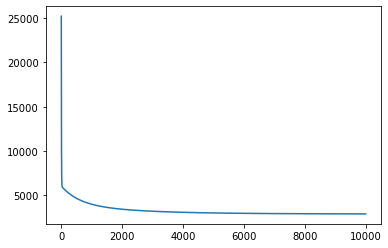

In [18]:
plt.plot(losses)
plt.show()

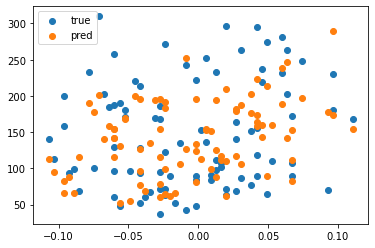

In [19]:
plt.scatter(X_test[:, 0], y_test,label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

# (11) 심화학습
1. RMSE로 loss 값 줄어드는지 확인하기

In [20]:
def RMSE(a, b):
    rmse = (((a - b) ** 2).mean())**(1/2)  # 두 값의 차이의 제곱의 평균의 루트
    return rmse

In [21]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = RMSE(predictions, y)
    return L

In [22]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [23]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ 0.19236966  0.21605225 -0.0899078   0.02364383 -0.06137426 -0.00397703
 -0.0711486   0.02282665 -0.22919545  0.11160817]
db: -1.521217189780159


In [24]:
LEARNING_RATE = 0.05

In [25]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
        #Iteration 10000 : rmse Loss 53.8331
        #Iteration 10000 : mse Loss 2914.6970
        #Iteration 10000 : mse Loss 3022.9808 ([1]sex drop : Max )

Iteration 10 : Loss 53.9874
Iteration 20 : Loss 53.9868
Iteration 30 : Loss 53.9862
Iteration 40 : Loss 53.9857
Iteration 50 : Loss 53.9851
Iteration 60 : Loss 53.9846
Iteration 70 : Loss 53.9840
Iteration 80 : Loss 53.9835
Iteration 90 : Loss 53.9829
Iteration 100 : Loss 53.9824
Iteration 110 : Loss 53.9818
Iteration 120 : Loss 53.9813
Iteration 130 : Loss 53.9807
Iteration 140 : Loss 53.9802
Iteration 150 : Loss 53.9797
Iteration 160 : Loss 53.9791
Iteration 170 : Loss 53.9786
Iteration 180 : Loss 53.9781
Iteration 190 : Loss 53.9775
Iteration 200 : Loss 53.9770
Iteration 210 : Loss 53.9765
Iteration 220 : Loss 53.9760
Iteration 230 : Loss 53.9754
Iteration 240 : Loss 53.9749
Iteration 250 : Loss 53.9744
Iteration 260 : Loss 53.9739
Iteration 270 : Loss 53.9734
Iteration 280 : Loss 53.9729
Iteration 290 : Loss 53.9724
Iteration 300 : Loss 53.9719
Iteration 310 : Loss 53.9714
Iteration 320 : Loss 53.9709
Iteration 330 : Loss 53.9704
Iteration 340 : Loss 53.9699
Iteration 350 : Loss 53

Iteration 3280 : Loss 53.8817
Iteration 3290 : Loss 53.8815
Iteration 3300 : Loss 53.8814
Iteration 3310 : Loss 53.8812
Iteration 3320 : Loss 53.8810
Iteration 3330 : Loss 53.8809
Iteration 3340 : Loss 53.8807
Iteration 3350 : Loss 53.8805
Iteration 3360 : Loss 53.8804
Iteration 3370 : Loss 53.8802
Iteration 3380 : Loss 53.8801
Iteration 3390 : Loss 53.8799
Iteration 3400 : Loss 53.8797
Iteration 3410 : Loss 53.8796
Iteration 3420 : Loss 53.8794
Iteration 3430 : Loss 53.8793
Iteration 3440 : Loss 53.8791
Iteration 3450 : Loss 53.8789
Iteration 3460 : Loss 53.8788
Iteration 3470 : Loss 53.8786
Iteration 3480 : Loss 53.8785
Iteration 3490 : Loss 53.8783
Iteration 3500 : Loss 53.8781
Iteration 3510 : Loss 53.8780
Iteration 3520 : Loss 53.8778
Iteration 3530 : Loss 53.8777
Iteration 3540 : Loss 53.8775
Iteration 3550 : Loss 53.8774
Iteration 3560 : Loss 53.8772
Iteration 3570 : Loss 53.8771
Iteration 3580 : Loss 53.8769
Iteration 3590 : Loss 53.8768
Iteration 3600 : Loss 53.8766
Iteration 

Iteration 6900 : Loss 53.8455
Iteration 6910 : Loss 53.8454
Iteration 6920 : Loss 53.8454
Iteration 6930 : Loss 53.8453
Iteration 6940 : Loss 53.8453
Iteration 6950 : Loss 53.8452
Iteration 6960 : Loss 53.8452
Iteration 6970 : Loss 53.8451
Iteration 6980 : Loss 53.8450
Iteration 6990 : Loss 53.8450
Iteration 7000 : Loss 53.8449
Iteration 7010 : Loss 53.8449
Iteration 7020 : Loss 53.8448
Iteration 7030 : Loss 53.8448
Iteration 7040 : Loss 53.8447
Iteration 7050 : Loss 53.8447
Iteration 7060 : Loss 53.8446
Iteration 7070 : Loss 53.8446
Iteration 7080 : Loss 53.8445
Iteration 7090 : Loss 53.8444
Iteration 7100 : Loss 53.8444
Iteration 7110 : Loss 53.8443
Iteration 7120 : Loss 53.8443
Iteration 7130 : Loss 53.8442
Iteration 7140 : Loss 53.8442
Iteration 7150 : Loss 53.8441
Iteration 7160 : Loss 53.8441
Iteration 7170 : Loss 53.8440
Iteration 7180 : Loss 53.8440
Iteration 7190 : Loss 53.8439
Iteration 7200 : Loss 53.8439
Iteration 7210 : Loss 53.8438
Iteration 7220 : Loss 53.8438
Iteration 

In [26]:
prediction = model(X_test, W, b)
rmse = loss(X_test, W, b, y_test)
rmse

53.667812763891675

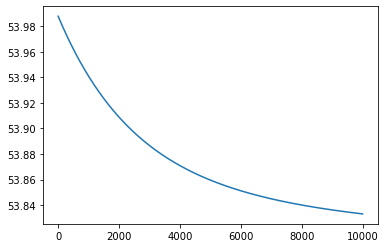

In [27]:
plt.plot(losses)
plt.show()

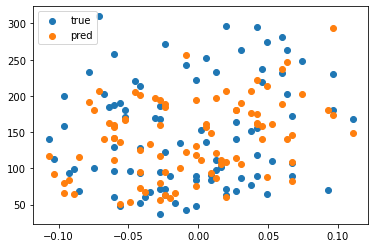

In [28]:
plt.scatter(X_test[:, 0], y_test,label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

2. Feature drop을 위해 Feature Importance를 구해보기  
(시간관계상 다음에 보충해서 알아보기로 함)

In [29]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
# model = RandomForestClassifier(criterion='entropy')
# model.fit(X,y)
# feature_importance = pd.DataFrame({
#     'feature': X_df_frame.columns,
#     'importance': model.feature_importances_
# })
# feature_importance

# (12) 회고

loss값이 너무 크게 나온다고 무턱대고 x의 feature를 drop시키려는 생각은 좋지 않았던 것 같다. 실제로 max 절대값이 가장 큰 성별을 drop했지만 loss는 더 늘어났다. 상식으로 생각해보니 당뇨병과 성별은 연관성이 있을 듯 하여 상관계수에 따라 feature을 drop할 수 있는가를 찾다가 feature importance를 도출하는 방법을 구글링하게 되었다. 아직 확실한 결론은 어렵지만, x의 features가 너무 많아 분산이 크거나, 그 연관성, 중요성에 따라 weight에 미치는 영향이 있을 것 같다. 

In [30]:
# 수익님 방법

LEARNING_RATE = 3
losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
        #Iteration 10000 : rmse Loss 53.8331
        #Iteration 10000 : mse Loss 2914.6970
        #Iteration 10000 : mse Loss 3022.9808 ([1]sex drop : Max )

Iteration 10 : Loss 53.8315
Iteration 20 : Loss 53.9134
Iteration 30 : Loss 29271486.3114
Iteration 40 : Loss 285901417742989.6250
Iteration 50 : Loss 2792465671130286391296.0000
Iteration 60 : Loss 27274661965653470681583583232.0000
Iteration 70 : Loss 266397969733879563269882714263650304.0000
Iteration 80 : Loss 2601970956329421632936198785946593796292608.0000
Iteration 90 : Loss 25414055761554926235448825327881932711620629233664.0000
Iteration 100 : Loss 248224996009391489985373302752810557056009406784053706752.0000
Iteration 110 : Loss 2424471293443503404800003517257054204238882661206045935242575872.0000
Iteration 120 : Loss 23680375253220766611618028121419494552913499496160194715886186571759616.0000
Iteration 130 : Loss 231291735088723678284710061827454808042595500664208556459028580967304119975936.0000
Iteration 140 : Loss 2259080193971014731165947130507704267092425872987957225657912158745122875085504380928.0000
Iteration 150 : Loss 220649619011869662887882658724722308349004369637

C:\Users\Soonju\anaconda3\envs\tf270\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Soonju\AppData\Local\Temp\ipykernel_13600\658470543.py:2: RuntimeWarning: overflow encountered in square
  rmse = (((a - b) ** 2).mean())**(1/2)  # 두 값의 차이의 제곱의 평균의 루트
C:\Users\Soonju\AppData\Local\Temp\ipykernel_13600\3105475007.py:9: RuntimeWarning: invalid value encountered in double_scalars
  b -= LEARNING_RATE * db
